
Refer to the "explore_questionnaire.pdf" in the folder for detailed explanation of the dataset.

<img src="./w56.png"/>

In [276]:
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

# Read feather frames to individual variables

anp_df = feather.read_dataframe('data_science_case/anp.feather')
face_df = feather.read_dataframe('data_science_case/face.feather')
image_df = feather.read_dataframe('data_science_case/image_data.feather')
metrics_df = feather.read_dataframe('data_science_case/image_metrics.feather')
object_labels_df = feather.read_dataframe('data_science_case/object_labels.feather')
survey_df = feather.read_dataframe('data_science_case/survey.feather')

In [277]:
# Merge them based on the image_id so that we have a large data frame containing all the elements

image_face_frame = pd.merge(image_df, face_df, how='inner', on='image_id')
# image_anp_frame = pd.merge(image_df, anp_df, how='inner', on='image_id')
# im_anp_obj_frame = pd.merge(image_anp_frame, object_labels_df, how='inner', on='image_id')
# im_anp_obj_face_frame = pd.merge(im_anp_obj_frame, face_df, how='inner', on='image_id')
# im_anp_obj_face_frame = pd.merge(im_anp_obj_frame, face_df, how='inner', on='image_id')

In [40]:
survey_df = survey_df[survey_df['imagecount'] > 0]
survey_df.head()

,id,gender,born,education,employed,income,A_2,N_1,P_1,E_1,...,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,private_account
0,920bf027f7d13dbdc7b66b3d3324903c,Male,1975,College graduate,Employed for wages,"$30,000 to $39,999",4,5,5,3,...,5,3.0,6.0,6.0,4.0,5,5.0,5,465.0,public
1,b433b2bfe49e28d0b7c45925b53084e0,Male,1978,College graduate,Employed for wages,"$20,000 to $29,999",8,0,9,7,...,9,7.0,9.0,8.0,7.0,9,0.0,9,6.0,public
4,f4f54676f75f47c17dc434cf68845328,Female,1990,High school graduate,Employed for wages,"$80,000 to $89,999",7,3,8,7,...,8,7.0,8.0,8.0,7.0,8,3.0,8,767.0,public
5,a27a5fc47a59f35761705330253a58e3,Male,1997,High school graduate,Employed for wages,"$20,000 to $29,999",7,5,7,4,...,7,4.0,4.0,7.0,7.0,7,5.0,7,43.0,public
6,0a1002b2232a4ecbde604462f6d84bf9,Female,1993,College graduate,A student,"$20,000 to $29,999",7,5,7,4,...,7,4.0,7.0,7.0,6.0,7,5.0,7,73.0,public


In [49]:
face_df['face_emo'].value_counts()

HAPPY        26311
SAD          15624
SURPRISED    12019
CONFUSED     11115
ANGRY         8960
CALM          8460
DISGUSTED     4388
Name: face_emo, dtype: int64

# Boolean vars

In [77]:
boolean_columns = ['face_beard', 'face_mustache', 'face_smile', 'eyeglasses']
boolean_columns_df = [image_face_frame[boolean_column].astype(int) for boolean_column in boolean_columns]

boolean_confidence_columns = ['face_beard_confidence', 'face_mustache_confidence', 'face_smile_confidence', 'eyeglasses_confidence']

boolean_confidence_columns_df = pd.DataFrame([image_face_frame[boolean_column] * image_face_frame[boolean_column + '_confidence'] for boolean_column in boolean_columns]).T
boolean_columns_calc = [boolean_column + '_calc' for boolean_column in boolean_columns]

boolean_confidence_columns_df.columns = boolean_columns_calc

In [87]:
boolean_confidence_columns_df.head()

,face_beard_calc,face_mustache_calc,face_smile_calc,eyeglasses_calc
0,0.0,0.0,87.779747,0.000000
1,0.0,0.0,87.779747,0.000000
2,0.0,0.0,87.779747,0.000000
3,0.0,0.0,0.000000,99.999596
4,0.0,0.0,0.000000,99.999596


In [106]:
image_face_frame_bool_calc = image_face_frame.join(boolean_confidence_columns_df)
image_face_frame_bool_calc.head()

,image_id,image_link,image_url,image_height,image_width,image_filter,image_posted_time_unix,image_posted_time,data_memorability,user_id,...,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,face_emo,emo_confidence,face_beard_calc,face_mustache_calc,face_smile_calc,eyeglasses_calc
0,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,...,1,87.779747,0,99.999870,HAPPY,96.513680,0.0,0.0,87.779747,0.000000
1,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,...,1,87.779747,0,99.999870,SAD,2.520150,0.0,0.0,87.779747,0.000000
2,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,...,1,87.779747,0,99.999870,SURPRISED,11.018240,0.0,0.0,87.779747,0.000000
3,553884883234370621_263042348,https://www.instagram.com/p/evy13fpLQ9/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1380248245,27-09-2013 02:17:25,0.843525,263042348,...,0,85.301117,1,99.999596,CONFUSED,41.312862,0.0,0.0,0.000000,99.999596
4,553884883234370621_263042348,https://www.instagram.com/p/evy13fpLQ9/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1380248245,27-09-2013 02:17:25,0.843525,263042348,...,0,85.301117,1,99.999596,HAPPY,11.824375,0.0,0.0,0.000000,99.999596


In [123]:
survey_user_with_perma_df = survey_df[['insta_user_id', 'P']]
survey_user_with_perma_df = survey_user_with_perma_df.rename(columns={'insta_user_id': 'user_id'})
survey_user_with_perma_df['user_id'] = survey_user_with_perma_df['user_id'].astype(int)
survey_user_with_perma_df.head()

,user_id,P
0,619868570,5
1,187920333,9
4,33420910,8
5,2143580844,7
6,263042348,7


In [124]:
len(survey_user_with_perma_df['user_id'].unique())

160

In [127]:
face_df_boolean = image_face_frame_bool_calc.groupby('user_id')[boolean_columns_calc].mean().reset_index()
face_df_boolean['user_id'] = face_df_boolean['user_id'].astype(int)
face_df_boolean.head()

,user_id,face_beard_calc,face_mustache_calc,face_smile_calc,eyeglasses_calc
0,1097967773,5.712069,4.950925,65.763703,9.702721
1,11520833,13.394744,12.166445,61.564970,20.024795
2,1223036636,33.588946,34.317378,57.363681,16.931880
3,1224423305,0.000000,0.000000,79.712158,0.000000
4,1249457735,12.545506,11.659811,78.139765,6.033681


In [128]:
len(face_df_boolean['user_id'].unique())

145

In [130]:
face_df_boolean_with_p = pd.merge(face_df_boolean, survey_user_with_perma_df, how='left', on='user_id')
face_df_boolean_with_p.head()

,user_id,face_beard_calc,face_mustache_calc,face_smile_calc,eyeglasses_calc,P
0,1097967773,5.712069,4.950925,65.763703,9.702721,6
1,11520833,13.394744,12.166445,61.564970,20.024795,7
2,1223036636,33.588946,34.317378,57.363681,16.931880,8
3,1224423305,0.000000,0.000000,79.712158,0.000000,9
4,1249457735,12.545506,11.659811,78.139765,6.033681,6


In [180]:
face_df_boolean_with_p.corr()

,user_id,face_beard_calc,face_mustache_calc,face_smile_calc,eyeglasses_calc,P
user_id,1.000000,0.172541,0.185834,-0.068973,0.199008,0.007775
face_beard_calc,0.172541,1.000000,0.923790,-0.290091,0.315100,0.151671
face_mustache_calc,0.185834,0.923790,1.000000,-0.240099,0.282057,0.180313
face_smile_calc,-0.068973,-0.290091,-0.240099,1.000000,-0.106993,0.014639
eyeglasses_calc,0.199008,0.315100,0.282057,-0.106993,1.000000,-0.070193
P,0.007775,0.151671,0.180313,0.014639,-0.070193,1.000000


# Emotion vars

In [215]:
face_emotion_df = image_face_frame[['user_id', 'face_emo', 'emo_confidence']]
face_emotion_df['user_id'] = face_emotion_df['user_id'].astype(int)
face_emotion_df.head()

/home/jo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,user_id,face_emo,emo_confidence
0,263042348,HAPPY,96.513680
1,263042348,SAD,2.520150
2,263042348,SURPRISED,11.018240
3,263042348,CONFUSED,41.312862
4,263042348,HAPPY,11.824375


In [ ]:
def func(user_id):
    df[df['user_id'] == user_id]n

In [216]:
def add_emotion(emotion):
    face_emotion_df[emotion] = face_emotion_df.loc[face_emotion_df['face_emo'] == emotion]['emo_confidence']
    return face_emotion_df

In [209]:
emotions = list(face_emotion_df['face_emo'].unique())
for emotion in emotions:
    add_emotion(emotion) 

/home/jo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [210]:
face_emotion_df = face_emotion_df.drop('face_emo', axis=1)
face_emotion_df = face_emotion_df.drop('emo_confidence', axis=1)

In [211]:
face_emotion_df = face_emotion_df.groupby('user_id').mean().reset_index()
face_df_emotion_with_p = pd.merge(face_emotion_df, survey_user_with_perma_df, how='left', on='user_id')

In [212]:
face_df_emotion_with_p.head()

,user_id,HAPPY,SAD,SURPRISED,CONFUSED,DISGUSTED,CALM,ANGRY,P
0,1619510,79.068926,14.074866,15.982254,7.837656,6.705342,5.726233,7.628984,4
1,2829661,85.288618,9.776246,9.865642,7.531726,4.862966,12.795863,7.609650,8
2,3069744,66.214778,17.333437,16.365114,10.465252,7.019021,11.662080,9.263856,7
3,3988856,68.290256,13.829991,20.473020,12.530977,14.028244,9.419956,7.004244,10
4,4185084,44.498180,19.884296,13.353562,12.232074,24.420738,57.014982,17.123119,6


In [222]:
face_df_emotion_with_p.corr()['P'].sort_values(ascending=False)

P            1.000000
ANGRY        0.179434
DISGUSTED    0.156660
SURPRISED    0.083714
user_id      0.007775
CONFUSED    -0.055372
CALM        -0.087090
HAPPY       -0.098879
SAD         -0.211301
Name: P, dtype: float64

# Face dataframe

In [368]:
face_final_df = pd.merge(face_df_boolean_with_p, face_df_emotion_with_p, on='user_id')
face_final_df.drop(['P_y'], axis=1, inplace=True)
face_final_df = face_final_df.rename(columns={'P_x': 'P'})
face_final_df = face_final_df.astype(np.float64, copy=False)
face_final_df['user_id'] = face_final_df['user_id'].astype(int)

In [369]:
face_final_df = face_final_df.fillna(method='ffill')

In [370]:
face_final_df.head()

,user_id,face_beard_calc,face_mustache_calc,face_smile_calc,eyeglasses_calc,P,HAPPY,SAD,SURPRISED,CONFUSED,DISGUSTED,CALM,ANGRY
0,1097967773,5.712069,4.950925,65.763703,9.702721,6.0,67.133565,14.129781,20.193410,8.965610,7.976685,5.412451,11.887474
1,11520833,13.394744,12.166445,61.564970,20.024795,7.0,69.369407,20.072799,17.624535,12.654190,11.357404,8.042111,9.383317
2,1223036636,33.588946,34.317378,57.363681,16.931880,8.0,65.370106,10.918731,13.652699,6.442891,25.830939,15.435058,26.030851
3,1224423305,0.000000,0.000000,79.712158,0.000000,9.0,7.883594,6.800479,13.652699,26.318949,25.830939,15.435058,26.030851
4,1249457735,12.545506,11.659811,78.139765,6.033681,6.0,77.297940,14.779954,29.972588,10.627847,0.293577,2.607133,12.053385


In [373]:
X_train = face_final_df[:90]
X_test = face_final_df[91:]

X_train.drop(['P'], axis=1, inplace=True)
X_test.drop(['P'], axis=1, inplace=True)

Y_train = face_final_df[:90]['P']
Y_test = face_final_df[91:]['P']

/home/jo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [374]:
X_train.head()

,user_id,face_beard_calc,face_mustache_calc,face_smile_calc,eyeglasses_calc,HAPPY,SAD,SURPRISED,CONFUSED,DISGUSTED,CALM,ANGRY
0,1097967773,5.712069,4.950925,65.763703,9.702721,67.133565,14.129781,20.193410,8.965610,7.976685,5.412451,11.887474
1,11520833,13.394744,12.166445,61.564970,20.024795,69.369407,20.072799,17.624535,12.654190,11.357404,8.042111,9.383317
2,1223036636,33.588946,34.317378,57.363681,16.931880,65.370106,10.918731,13.652699,6.442891,25.830939,15.435058,26.030851
3,1224423305,0.000000,0.000000,79.712158,0.000000,7.883594,6.800479,13.652699,26.318949,25.830939,15.435058,26.030851
4,1249457735,12.545506,11.659811,78.139765,6.033681,77.297940,14.779954,29.972588,10.627847,0.293577,2.607133,12.053385


In [375]:
Y_train.head()

0    6.0
1    7.0
2    8.0
3    9.0
4    6.0
Name: P, dtype: float64

#### Fitting the linear model

In [376]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [387]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [388]:
# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [389]:
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

In [390]:
len(Y_test), len(X_test)

(60, 60)

In [391]:
Y_pred

array([ 5.92052767,  6.70157349,  7.14395718,  6.64873255,  6.39952208,
        6.13244034,  6.21594484,  6.59756735,  7.00583819,  6.98723506,
        7.59043559,  6.05450277,  6.27144403,  6.13029253,  4.66270625,
        6.64834023,  6.10130259,  6.33617254,  6.99215267,  6.23354485,
        5.38961252,  6.37179065,  5.76147933,  8.03230121,  7.92693189,
        6.0816802 ,  5.56162882,  6.27089846,  6.60939852,  6.33917426,
        6.52253052,  6.73399127,  6.69402653,  7.01650046,  6.29126332,
        7.94963531,  6.74778723,  6.82835838,  6.95504596,  6.36633941,
        6.58838541,  6.56980423,  6.5569625 ,  6.40402139,  6.58693048,
        6.68080986,  6.6164224 ,  6.13587947,  8.19709173,  6.39587825,
        6.06891359,  6.74315724,  6.24215143,  6.24215143,  6.24215143,
        6.24215143,  6.90463441,  6.5133362 ,  6.45650219,  7.68214797])

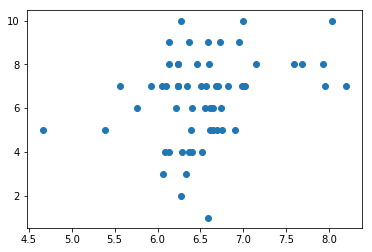

In [392]:
plt.scatter(Y_pred, Y_test)
plt.show()

In [402]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Coefficients: 
 [ -8.48011763e-11  -7.61238903e-04   3.63659089e-03   1.32191205e-02
  -1.53536575e-02  -1.25283371e-02  -4.22996005e-02   1.71573586e-03
  -1.61240371e-02   6.58604392e-02  -2.75686408e-02   3.34875283e-02]
Mean squared error: 3.38
Variance score: 0.10


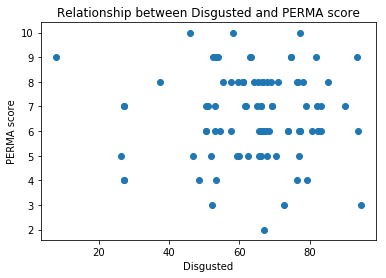

In [394]:
plt.scatter(X_train['HAPPY'], Y_train)
plt.xlabel("Disgusted")
plt.ylabel("PERMA score")
plt.title("Relationship between Disgusted and PERMA score")
plt.show()
# As can be seen that there is a positive correlation between RM and housing prices.

In [395]:
lm.predict(X_test)[0:5]

array([ 5.92052767,  6.70157349,  7.14395718,  6.64873255,  6.39952208])

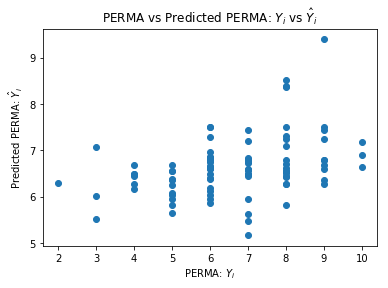

In [406]:
plt.scatter(Y_train, lm.predict(X_train))
plt.xlabel("PERMA: $Y_i$")
plt.ylabel("Predicted PERMA: $\hat{Y}_i$")
plt.title("PERMA vs Predicted PERMA: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [407]:
#We can notice that there is some error in  the prediction as the housing prices increase.
#Lets calculate the mean squared error.
mseFull = np.mean(Y_train - lm.predict(X_train)** 2)
print(mseFull)

-37.93042961746988
